In [18]:
pip install opencv-python numpy pandas


  Using cached https://files.pythonhosted.org/packages/a7/26/629aa9f3187c77725f8dc045c6dc922bc846cff386f7e5945e845e104bbe/colormap-1.0.3.tar.gz
  Created wheel for colormap: filename=colormap-1.0.3-cp37-none-any.whl size=15569 sha256=7b280929337da1a38015ddd524d31a82edb6211d22154c961d541ecc49fad6f0
  Stored in directory: C:\Users\aniru\AppData\Local\pip\Cache\wheels\b5\c4\23\5f5d3e77fb0d00f44ee147a9cbb3acb641b9ebe2f3d5406c66
Successfully built colormap
Note: you may need to restart the kernel to use updated packages.


In [21]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76

import os

%matplotlib inline

In [9]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

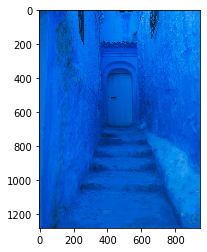

In [27]:
image = get_image('Photo from Niharika 4.jpg')
plt.imshow(image)

In [28]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [42]:
def get_colors(image, no_of_colors, show_chart):
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    clf = KMeans(n_clusters = no_of_colors)
    labels = clf.fit_predict(modified_image)
    counts = Counter(labels)

    center_colors = clf.cluster_centers_
    # We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]

    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)

    return rgb_colors
    

[array([  0.96930855,  78.19313011, 189.06218587]),
 array([  0.92448696,  93.07369602, 204.38972317]),
 array([  1.07644611,  69.06991261, 169.47332501]),
 array([ 26.56485356, 151.53588671, 244.2735758 ]),
 array([  0.78738507,  82.66495403, 210.35894402]),
 array([  0.87886026,  96.2287518 , 223.2295074 ]),
 array([  1.13953661,  57.80365365, 143.66278034]),
 array([  1.17130635, 111.50776571, 231.88713393]),
 array([  1.83205826, 132.624596  , 238.3469705 ]),
 array([ 2.68526171, 44.55819559, 93.87052342])]

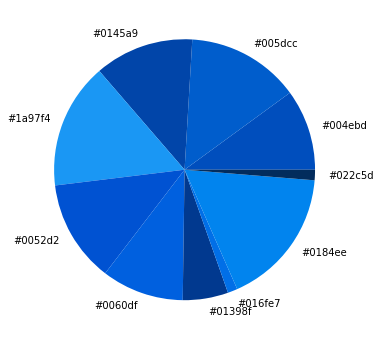

In [31]:
get_colors(image, 8, True)

In [32]:
IMAGE_DIRECTORY = 'images'
COLORS = {
    'GREEN': [0, 128, 0],
    'BLUE': [0, 0, 128],
    'YELLOW': [255, 255, 0]
}
images = []

for file in os.listdir(IMAGE_DIRECTORY):
    if not file.startswith('.'):
        images.append(get_image(os.path.join(IMAGE_DIRECTORY, file)))

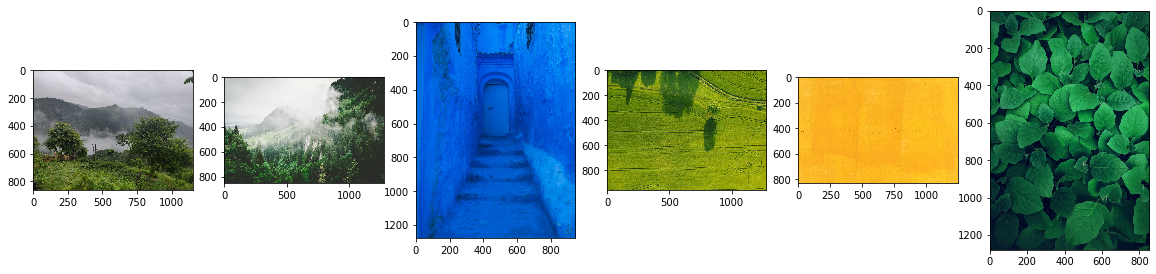

In [33]:
plt.figure(figsize=(20, 10))
for i in range(len(images)):
    plt.subplot(1, len(images), i+1)
    plt.imshow(images[i])

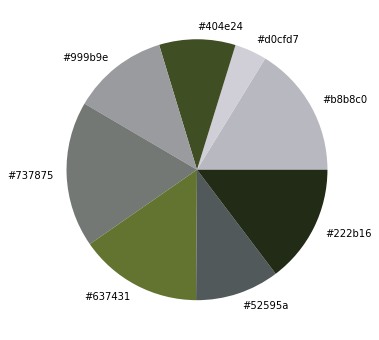

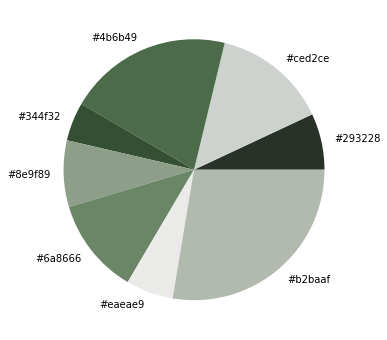

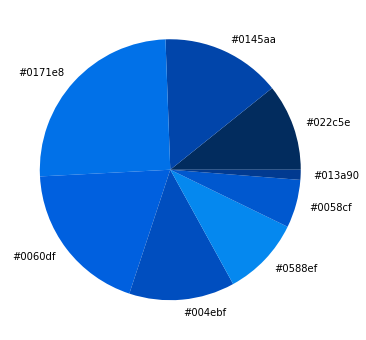

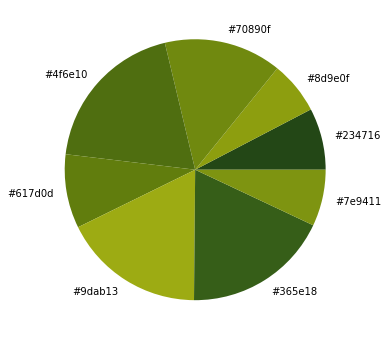

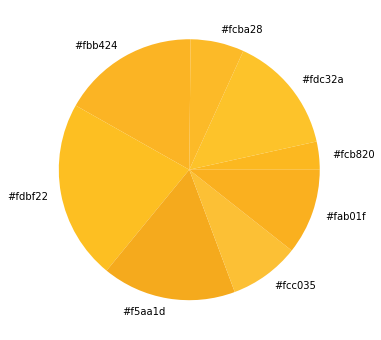

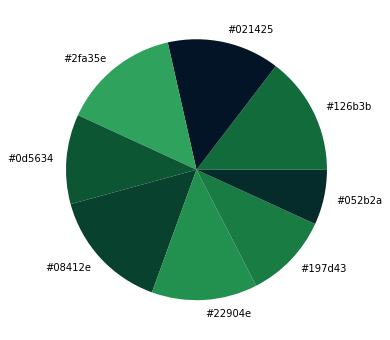

In [47]:
for image in images:
    get_colors(image, 8, True)

In [43]:
def match_image_by_color(image, color, threshold = 60, number_of_colors = 10): 
    
    image_colors = get_colors(image, number_of_colors, False)
    selected_color = rgb2lab(np.uint8(np.asarray([[color]])))

    select_image = False
    for i in range(number_of_colors):
        curr_color = rgb2lab(np.uint8(np.asarray([[image_colors[i]]])))
        diff = deltaE_cie76(selected_color, curr_color)
        if (diff < threshold):
            select_image = True
    
    return select_image

In [44]:
def show_selected_images(images, color, threshold, colors_to_match):
    index = 1
    
    for i in range(len(images)):
        selected = match_image_by_color(images[i],
                                        color,
                                        threshold,
                                        colors_to_match)
        if (selected):
            plt.subplot(1, 5, index)
            plt.imshow(images[i])
            index += 1

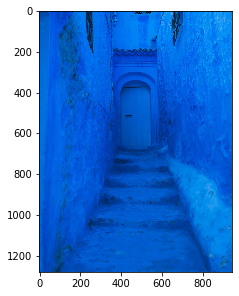

In [46]:
selected_color = COLORS['BLUE']
plt.figure(figsize = (20, 10))
show_selected_images(images, selected_color, 60, 5)